## Scaling Exercises

#### 1. Apply the scalers we talked about in this lesson to your data and visualize the results in a way that can .

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import env 
import os

import acquire

import warnings
warnings.filterwarnings("ignore")

In [2]:
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

In [3]:
df = acquire.new_telco_data()

In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [6]:
train_and_validate, test = train_test_split(df, random_state=123)
train, validate = train_test_split(train_and_validate)

train.shape, validate.shape, test.shape


((3961, 21), (1321, 21), (1761, 21))

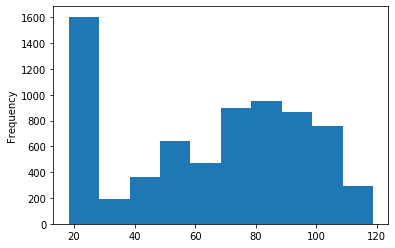

In [7]:
df.monthly_charges.plot.hist()

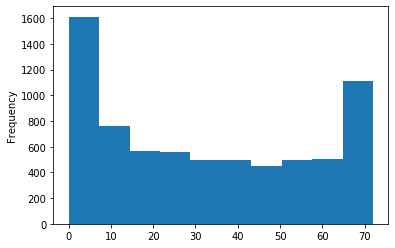

In [8]:
df.tenure.plot.hist()

## Min-Max Scaling

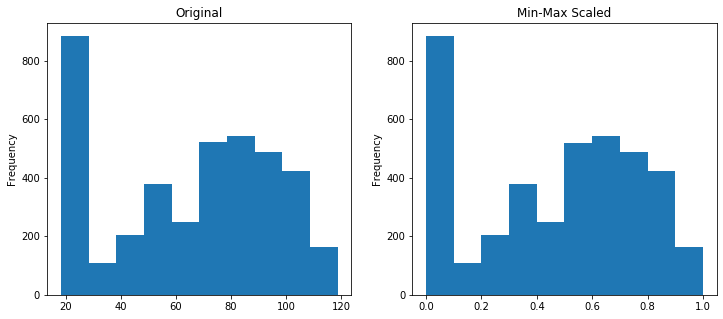

In [9]:
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
min_max_scaler.fit(train[['monthly_charges']])

train['monthly_charges_scaled'] = min_max_scaler.transform(train[['monthly_charges']])
test['monthly_charges_scaled'] = min_max_scaler.transform(test[['monthly_charges']])
validate['monthly_charges_scaled'] = min_max_scaler.transform(validate[['monthly_charges']])

plt.figure(figsize=(12, 5))
plt.subplot(121)
train.monthly_charges.plot.hist(title='Original')
plt.subplot(122)
train.monthly_charges_scaled.plot.hist(title='Min-Max Scaled')

In [10]:
def visualize_scaler(scaler, scaler_name):
    monthly_charges_scaled = scaler.fit_transform(train[['monthly_charges']])
    fig = plt.figure(figsize=(12, 10))
    gs = plt.GridSpec(2, 2)
    ax1 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1, 0])
    ax3 = fig.add_subplot(gs[1, 1]) 
    
    ax1.scatter(train.monthly_charges, monthly_charges_scaled)
    ax1.set(xlabel='monthly_charges', ylabel='monthly_charges_scaled', title=scaler_name)
    ax2.hist(train.monthly_charges)
    ax2.set(title='Original')
    ax3.hist(monthly_charges_scaled)
    ax3.set(title='Scaled')

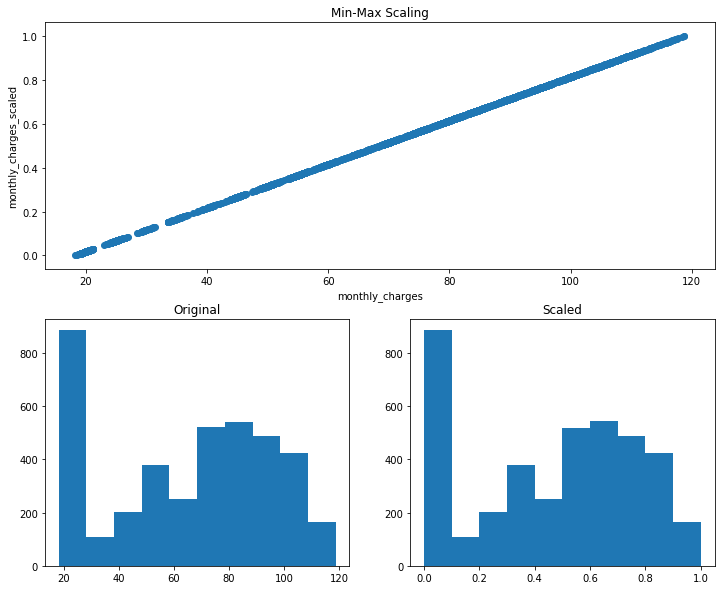

In [11]:
visualize_scaler(sklearn.preprocessing.MinMaxScaler(), 'Min-Max Scaling')

## Standard Scaler

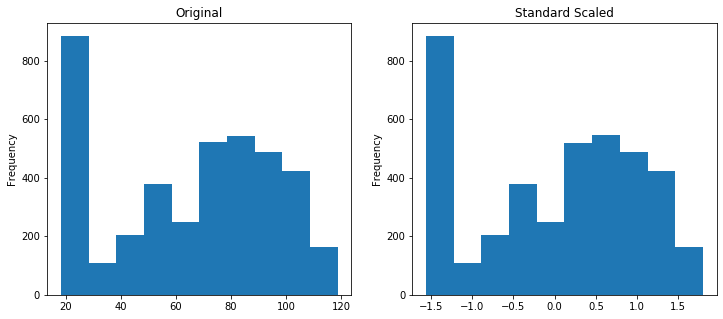

In [12]:
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(train[['monthly_charges']])

train['monthly_charges_scaled'] = scaler.transform(train[['monthly_charges']])
test['monthly_charges_scaled'] = scaler.transform(test[['monthly_charges']])
validate['monthly_charges_scaled'] = scaler.transform(validate[['monthly_charges']])

plt.figure(figsize=(12, 5))
plt.subplot(121)
train.monthly_charges.plot.hist(title='Original')
plt.subplot(122)
train.monthly_charges_scaled.plot.hist(title='Standard Scaled')

## RobustScaler

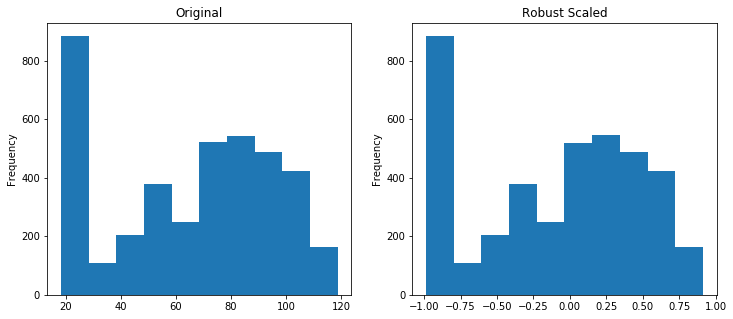

In [13]:
scaler = sklearn.preprocessing.RobustScaler()
scaler.fit(train[['monthly_charges']])

train['monthly_charges_scaled'] = scaler.transform(train[['monthly_charges']])
test['monthly_charges_scaled'] = scaler.transform(test[['monthly_charges']])
validate['monthly_charges_scaled'] = scaler.transform(validate[['monthly_charges']])

plt.figure(figsize=(12, 5))
plt.subplot(121)
train.monthly_charges.plot.hist(title='Original')
plt.subplot(122)
train.monthly_charges_scaled.plot.hist(title='Robust Scaled')

#### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [14]:
min_max_scaler.inverse_transform(train[['monthly_charges_scaled']])

array([[ 82.2131728 ],
       [-14.1111898 ],
       [-77.59985836],
       ...,
       [-76.27124646],
       [-76.27124646],
       [ 14.83356941]])

#### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

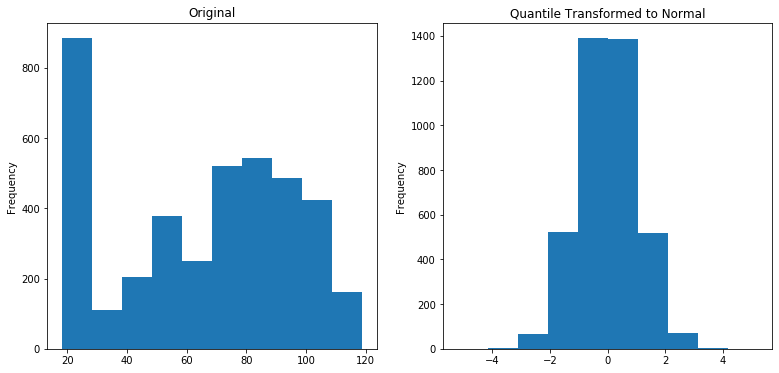

In [15]:
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

scaler.fit(train[['monthly_charges']])
# 3. use the object
train['monthly_charges_scaled'] = scaler.transform(train[['monthly_charges']])
test['monthly_charges_scaled'] = scaler.transform(test[['monthly_charges']])
validate['monthly_charges_scaled'] = scaler.transform(validate[['monthly_charges']])

plt.figure(figsize=(13, 6))
plt.subplot(121)
train.monthly_charges.plot.hist(title='Original')
plt.subplot(122)
train.monthly_charges_scaled.plot.hist(title='Quantile Transformed to Normal')

#### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [16]:
sklearn.preprocessing.QuantileTransformer

sklearn.preprocessing._data.QuantileTransformer

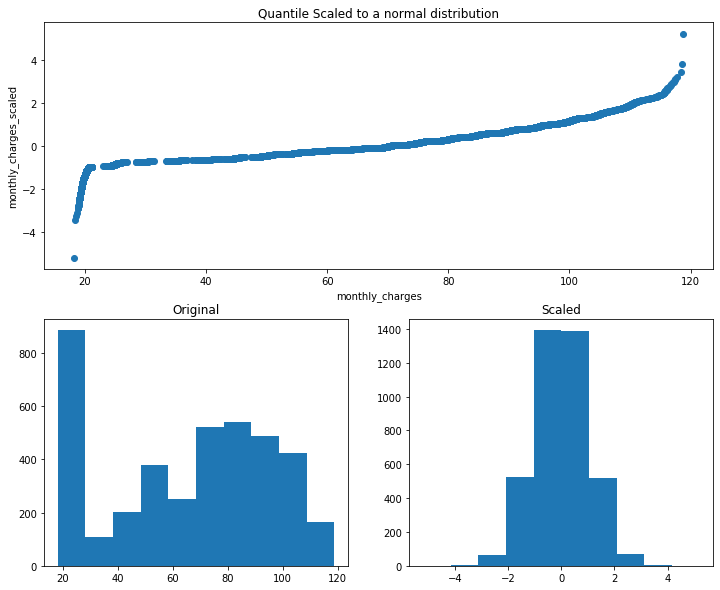

In [17]:
visualize_scaler(
    sklearn.preprocessing.QuantileTransformer(output_distribution='normal'),
    'Quantile Scaled to a normal distribution',)

#### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [18]:
def mm_scaler(train, validate, test):

    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    min_max_scaler.fit(train[['monthly_charges']])

    train['monthly_charges_scaled'] = min_max_scaler.transform(train[['monthly_charges']])
    test['monthly_charges_scaled'] = min_max_scaler.transform(test[['monthly_charges']])
    validate['monthly_charges_scaled'] = min_max_scaler.transform(validate[['monthly_charges']])

mm_scaler(train, validate, test)